### Student Information
Name: 蕭玉琁

Student ID: 111700045

GitHub ID: r0wan1ooo5

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. Setup

In [70]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download("punkt_tab")
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math

import helpers.data_mining_helpers as dmh
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/r0wan/DM2025/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


[nltk_data] Downloading package punkt to /Users/r0wan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/r0wan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 2. Data Preparation
### 3. Data Transformation

In [71]:
Reddit = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
Reddit.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [72]:
Reddit.dtypes

type             object
datetime         object
post_id          object
subreddit        object
title            object
author           object
url              object
upvotes           int64
downvotes       float64
upvote_ratio    float64
text             object
subjectivity    float64
polarity        float64
sentiment       float64
entities         object
label           float64
dtype: object

In [ ]:
# recorrect data type
if 'datetime' in Reddit.columns:
    Reddit['datetime'] = pd.to_datetime(Reddit['datetime'], errors='coerce')

In [74]:
Reddit.dtypes

type                    object
datetime        datetime64[ns]
post_id                 object
subreddit               object
title                   object
author                  object
url                     object
upvotes                  int64
downvotes              float64
upvote_ratio           float64
text                    object
subjectivity           float64
polarity               float64
sentiment              float64
entities                object
label                  float64
dtype: object

In [ ]:
# create a new binary column 'is_post' where 'type' is 'post'
Reddit['is_post'] = (Reddit['type'] == 'post').astype(int)

In [77]:
len(Reddit)

847

### 4. Data Mining using Pandas

In [78]:
# check missing values
Reddit.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0,0


In [79]:
# check duplicates
sum(Reddit.duplicated())

0

In [80]:
sum(Reddit['text'].duplicated())

23

In [161]:
# Show all columns for rows with duplicated 'text'
duplicated_texts = Reddit[Reddit['text'].duplicated(keep=False)]
display(duplicated_texts)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0,0
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,NaN,NaN,So they went from saying redditors are bad for...,0.666667,-0.7000,-1.0,"['market', 'silver']",1.0,0
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0,1
105,post,2025-04-04 09:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,\n\n [World Markets (stockbuyvest.com)](),0.000000,0.0000,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0,1
159,post,2025-04-11 13:54:31,1jwqgce,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Gappers for today\n\n [Gappers (stockbuyvest.c...,0.000000,0.0000,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0,1
160,post,2025-04-03 12:18:32,1jqgwyz,stockstobuytoday,Futures Market,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"how does the futures market look today\n\nSPY,...",0.377083,0.0625,1.0,"['Natural', 'stockbuyvest.com', 'Gold', 'marke...",0.0,1
179,post,2025-03-25 15:47:42,1jjmipo,stockstobuytoday,Dark Pool Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,This data is from FINRA ATS - Updated Weekly\n...,0.000000,0.0000,0.0,"['FINRA', 'data', 'ATS', 'FINRA ATS - Updated'...",0.0,1
192,post,2025-03-21 21:15:20,1jgrs02,stockstobuytoday,Commitment of Trader Report,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"Summarized with Highlights, updated weekly be ...",0.000000,0.0000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0,1
284,post,2025-04-06 16:00:59,1jsxft7,stockstobuytoday,Crypto Gainers - Coinbase,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,"&#x200B;\n\n [Cryptocurrency Prices, Charts, D...",0.000000,0.0000,0.0,"[']', 'Daily', 'Charts', 'PEPEUSD', 'Prices', ...",0.0,1
349,post,2025-03-22 18:14:30,1jhestv,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.0,Updated Daily by EOD\n\n \n[Daily Shorts](),0.100000,0.0000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0,1


In [160]:
# Show all columns for rows where both 'datetime' and 'text' are duplicated together
duplicated_dt_text = Reddit[Reddit.duplicated(subset=['datetime', 'text'], keep=False)]
display(duplicated_dt_text)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post


Althought there are 23 duplicate 'text', their 'datatime' is different. Since that might be the feature of the data (not wrong collection), i decided keep them.

#### 5. Data Preprocessing

##### 5.1 Sampling

In [82]:
Reddit_sample = Reddit.sample(n=500, random_state=42)
Reddit_sample.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,"""We"" who?",0.000000,0.000000,0.0,[],0.0,0
342,comment,2025-04-12 03:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0,0
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0,0
275,comment,2025-04-12 02:27:29,mmo5u51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,ChristianLS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,0
843,comment,2025-04-11 05:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0,0


In [83]:
print(f"lenth of Reddit: {len(Reddit)}")
print(f"lenth of Reddit_sample: {len(Reddit_sample)}")      


lenth of Reddit: 847
lenth of Reddit_sample: 500


In [163]:
# choose column 'sentiment' as target
print(Reddit_sample.sentiment.value_counts())


sentiment
 0.0    205
 1.0    186
-1.0    109
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='Sentiment', ylabel='Count'>

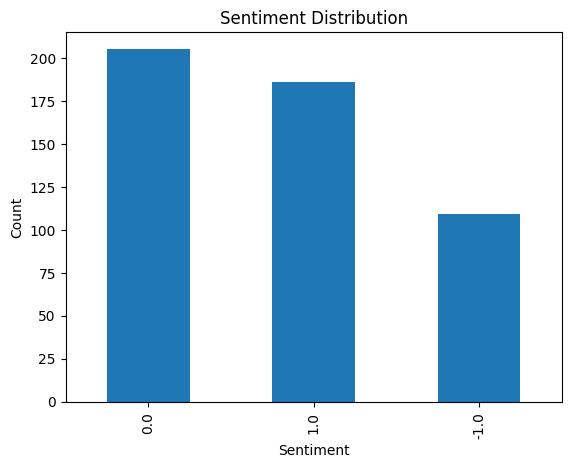

In [84]:
Reddit_sample.sentiment.value_counts().plot(kind='bar',
                                     title='Sentiment Distribution',
                                     ylim=[0, Reddit_sample.sentiment.value_counts().max() + 10],
                                     xlabel='Sentiment',
                                     ylabel='Count')

<Axes: title={'center': 'Sentiment Distribution Comparison'}, xlabel='Sentiment', ylabel='Count'>

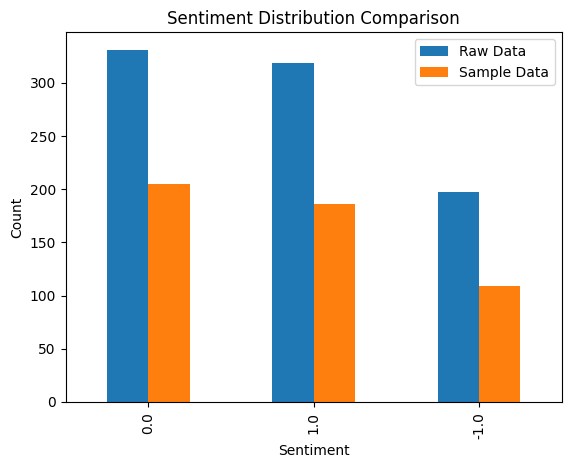

In [85]:
# compare sentiment distribution between raw data and sample data
raw_data = Reddit.sentiment.value_counts()
sample_data = Reddit_sample.sentiment.value_counts()   

df_compare = pd.DataFrame({
    'Raw Data': raw_data, 
    'Sample Data': sample_data})
df_compare.plot(
    kind='bar', 
    title='Sentiment Distribution Comparison', 
    xlabel='Sentiment', ylabel='Count')


##### 5.2 Feature Creation

In [88]:
Reddit_sample['unigrams'] = Reddit_sample['text'].apply(lambda x: dmh.tokenize_text(x))

In [89]:
Reddit_sample[0:4]["unigrams"]

457                                 [``, We, '', who, ?]
342                                    [Chicken, jockey]
280                                    [Not, great, Bob]
275    [Speak, for, yourself, ,, my, wife, is, being,...
Name: unigrams, dtype: object

In [90]:
Reddit_sample.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,is_post,unigrams
457,comment,2025-04-11 15:42:58,mmkwda9,StockMarket,Trump: We Are Doing Really Well On Our Tariff ...,IamNotaMonkeyRobot,https://i.redd.it/uajqu4kxl7ue1.png,1,NaN,NaN,"""We"" who?",0.000000,0.000000,0.0,[],0.0,0,"[``, We, '', who, ?]"
342,comment,2025-04-12 03:04:05,mmob98a,wallstreetbets,Retail giant TARGET has now declined for 10 co...,iPlayedHockeInHS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,Chicken jockey,0.950000,-0.600000,-1.0,"['jockey', 'Chicken']",0.0,0,"[Chicken, jockey]"
280,comment,2025-04-10 14:40:26,mme8wxn,StockMarket,How do you feel about a sitting president maki...,Narradisall,https://apnews.com/article/trump-truth-social-...,2,NaN,NaN,Not great Bob,0.750000,0.800000,1.0,['Bob'],-1.0,0,"[Not, great, Bob]"
275,comment,2025-04-12 02:27:29,mmo5u51,wallstreetbets,Retail giant TARGET has now declined for 10 co...,ChristianLS,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,"Speak for yourself, my wife is being harder on...",0.633333,0.633333,1.0,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,0,"[Speak, for, yourself, ,, my, wife, is, being,..."
843,comment,2025-04-11 05:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0,0,"[Where, can, I, read, this, ?]"


In [99]:
list(Reddit_sample[0:1]['unigrams'])

[['``', 'We', "''", 'who', '?']]

##### 5.3 Feature subset selection

In [165]:
count_vect = CountVectorizer()
Reddit_sample_counts = count_vect.fit_transform(Reddit_sample.text) #learn the vocabulary and return document-term matrix
print(Reddit_sample_counts[0])

  (np.int32(0), np.int32(3142))	1
  (np.int32(0), np.int32(3175))	1


In [166]:
analyze = count_vect.build_analyzer()
analyze(Reddit_sample.text[457])

['we', 'who']

In [106]:
Reddit_sample_counts.shape

(500, 3263)

In [109]:
count_vect.get_feature_names_out()[0:10]


array(['000', '01378', '02', '03', '08', '10', '100', '1000', '10000',
       '100k'], dtype=object)

In [110]:
Reddit_sample_counts.shape

(500, 3263)

In [118]:
Reddit_sample_counts[8:12, 0:200].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

In [119]:
count_vect.get_feature_names_out()[196:197]

array(['all'], dtype=object)

In [121]:
col_indices = Reddit_sample_counts[0:12, 0:200].nonzero()[1]   # take the non-zero column index
words = [count_vect.get_feature_names_out()[i] for i in col_indices]
for i in range(len(col_indices)):
    print(f"word {col_indices[i]}: {words[i]}")

word 84: 50
word 36: 200k
word 84: 50
word 57: 30
word 33: 20
word 11: 11
word 196: all


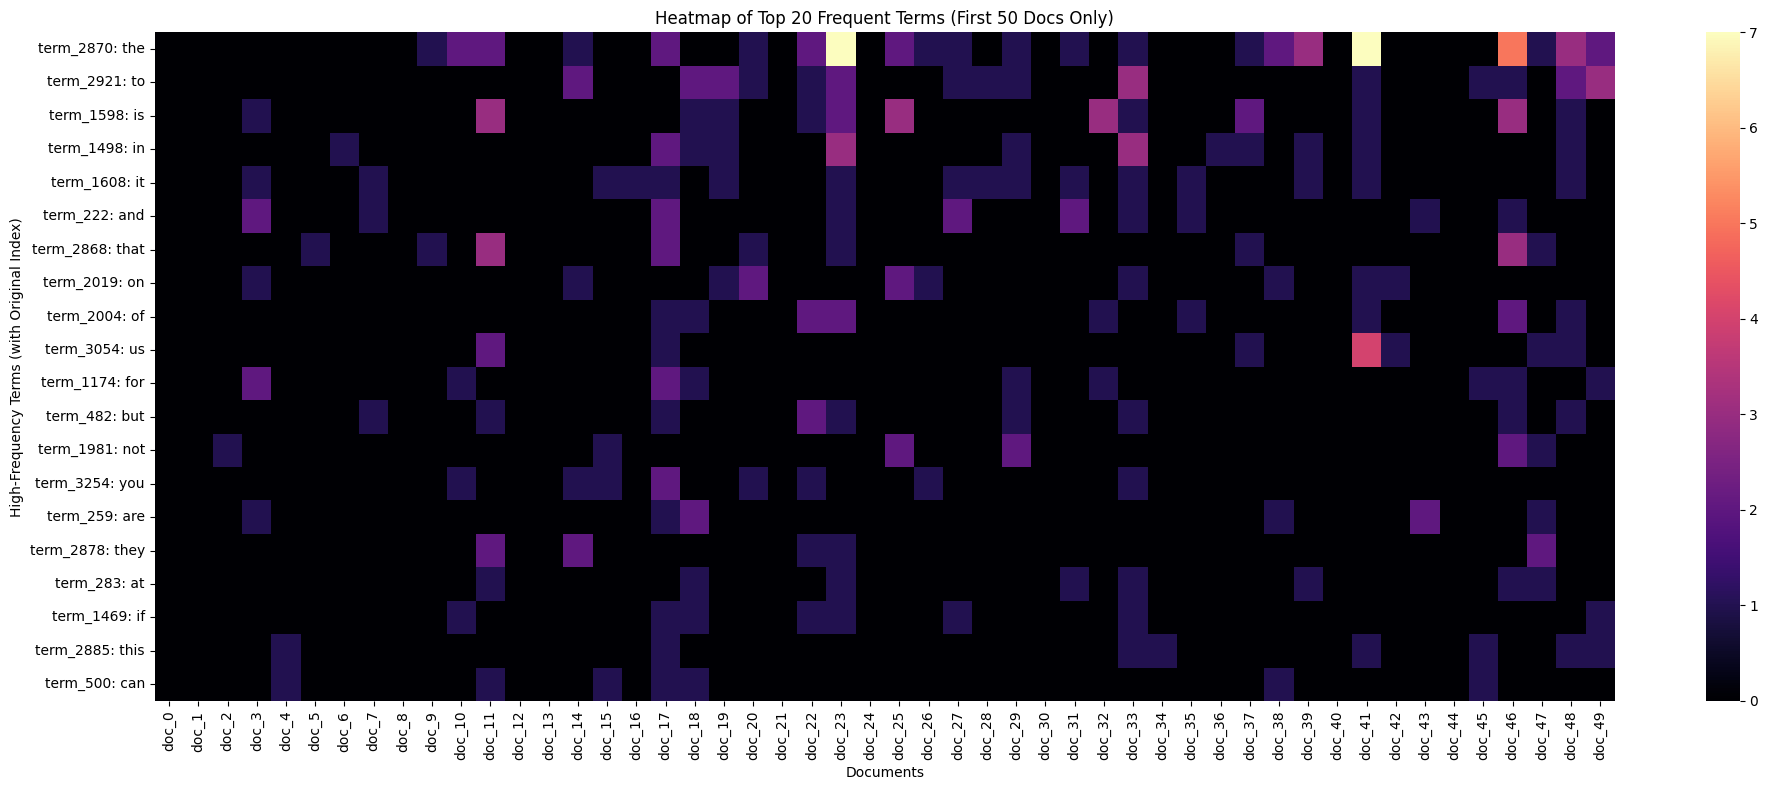

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

num_docs = 50  # choose the amount of documents to visualize
top_n = 20     # choose the amount of top frequent terms to visualize

# calculate term frequencies in the first num_docs documents
term_freq = np.asarray(Reddit_sample_counts[:num_docs].sum(axis=0)).ravel()
top_idx = np.argsort(term_freq)[::-1][:top_n]   

# take the amount of top_n terms in each of the first num_docs documents
X_top = Reddit_sample_counts[:num_docs, top_idx].toarray()

# take term names
terms = np.array(count_vect.get_feature_names_out())[top_idx]

# labels for plot
exer_plot_x = [f"term_{idx}: {term}" for idx, term in zip(top_idx, terms)]
exer_plot_y = [f"doc_{i}" for i in range(num_docs)]

df_todraw = pd.DataFrame(
    X_top.T,
    index=exer_plot_x,
    columns=exer_plot_y
)

plt.figure(figsize=(min(20, num_docs // 2), 8))
sns.heatmap(df_todraw, cmap="magma", cbar=True)
plt.xlabel("Documents")
plt.ylabel("High-Frequency Terms (with Original Index)")
plt.title(f"Heatmap of Top {top_n} Frequent Terms (First {num_docs} Docs Only)")
plt.tight_layout()
plt.show()


##### 5.4 Attribute Transformation

In [125]:
term_frequencies = []
for j in range(0,Reddit_sample_counts.shape[1]):
    term_frequencies.append(sum(Reddit_sample_counts[:,j].toarray()))

term_frequencies = np.asarray(Reddit_sample_counts.sum(axis=0))[0]
term_frequencies[0] 


np.int64(5)

In [126]:
import plotly.express as px

fig = px.bar(
    x = count_vect.get_feature_names_out()[:300],
    y = term_frequencies[:300],                     # choose top 300 terms
    labels={'x':'Terms', 'y':'Frequencies'},
    title="Top 300 Terms Frequency"
)
fig.update_layout(xaxis_tickangle=90)  
fig.show()


top frequency terms

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_57444/3197308098.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



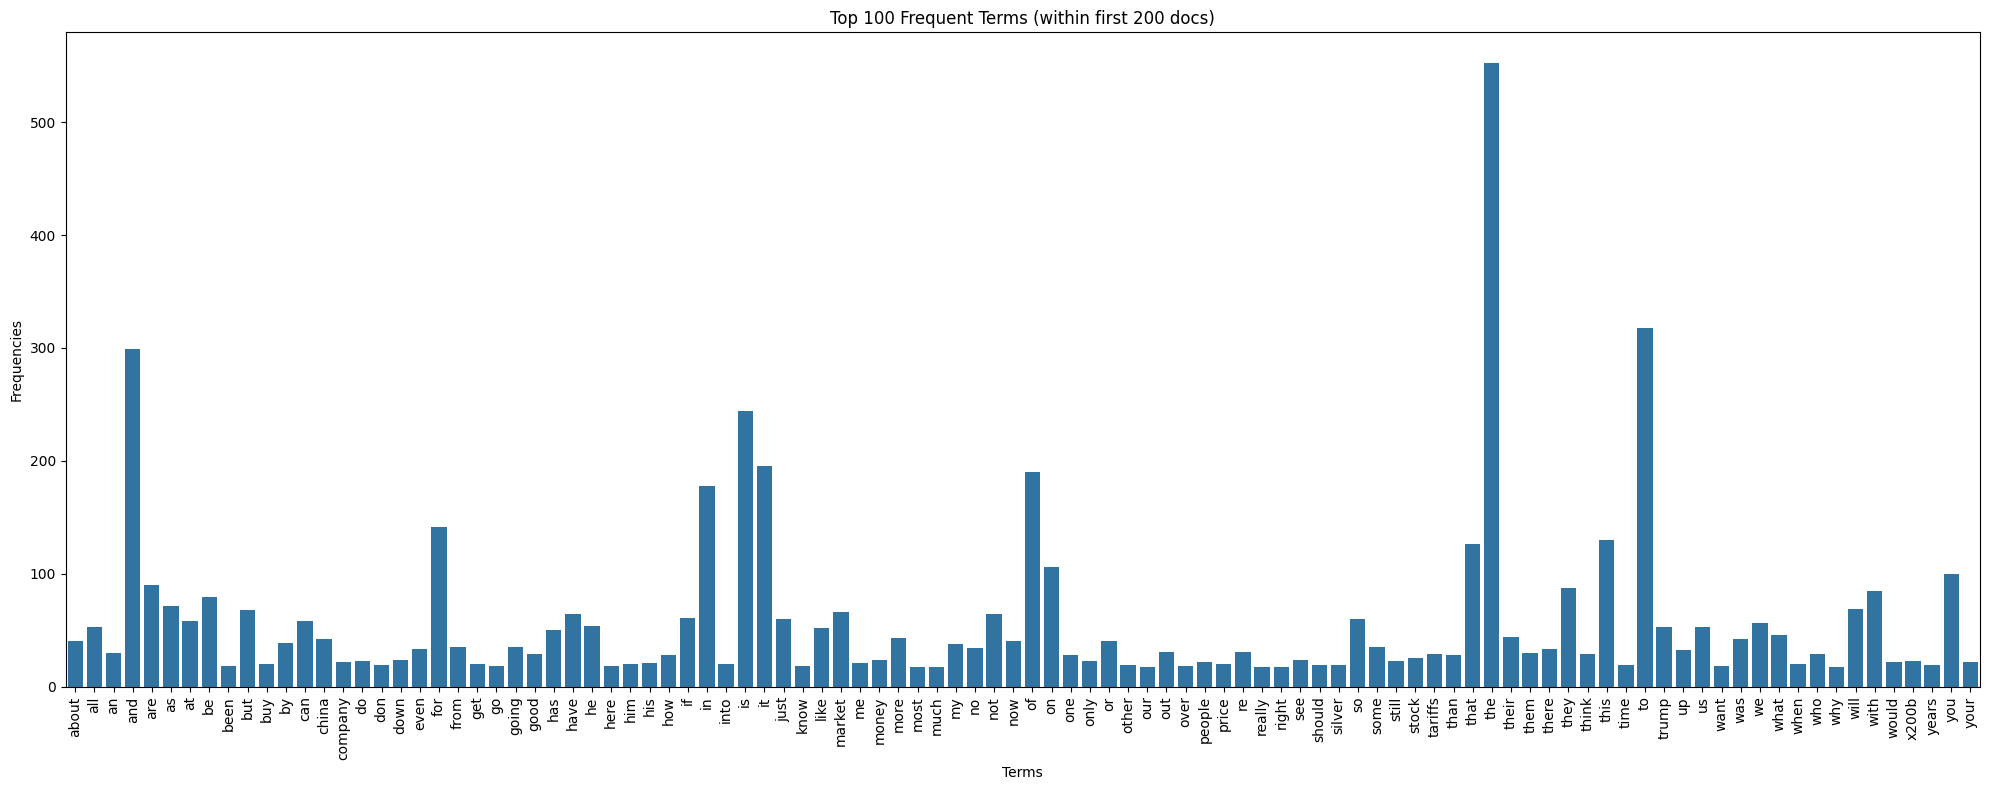

In [128]:
num_docs_2 = 200   # choose the amount of documents to visualize
top_n_2  = 100     # choose the amount of top frequent terms to visualize

# cauculate term frequencies in the first num_docs documents
term_freq_2 = np.asarray(Reddit_sample_counts.sum(axis=0)).ravel()

# pick the indices of the top_n_2 most frequent terms (no sorting by frequency)
rough     = np.argpartition(term_freq_2, -top_n_2)[-top_n_2:]
topn_idx  = np.sort(rough)   

# take the amount of top_n terms in each of the first num_docs documents
X_small = Reddit_sample_counts[:num_docs_2, topn_idx].toarray()
terms   = np.array(count_vect.get_feature_names_out())[topn_idx]

# collect the top term frequencies for plotting
top_term_freq_2 = term_freq_2[topn_idx]


plt.figure(figsize=(20, 8))
g = sns.barplot(x=terms, y=top_term_freq_2)
g.set_xticklabels(terms, rotation=90)
plt.title(f"Top {top_n_2} Frequent Terms (within first {num_docs_2} docs)")
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.tight_layout()
plt.show()


top frequency terms ( long-tailed )

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_57444/4056161656.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



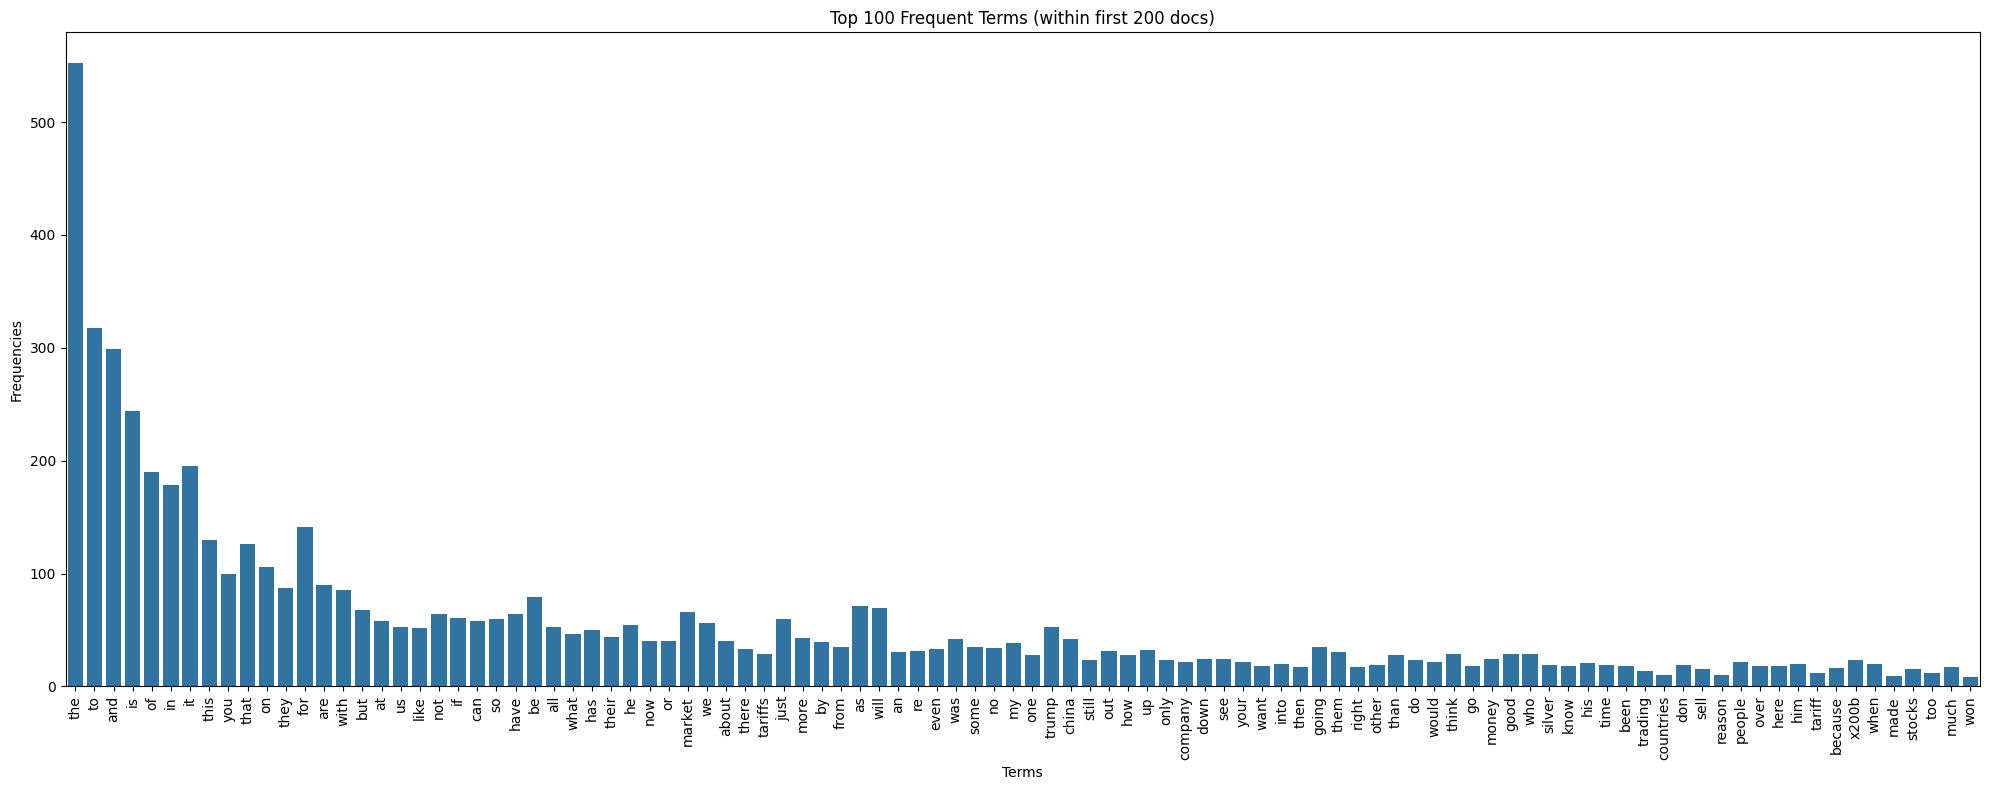

In [129]:
num_docs_2 = 200   # choose the amount of documents to visualize
top_n_2  = 100     # choose the amount of top frequent terms to visualize

# cauculate term frequencies in the first num_docs documents
term_frequencies_log = np.asarray(Reddit_sample_counts[:num_docs_2].sum(axis=0)).ravel()

# pick the indices of the top_n most frequent terms efficiently (O(n) partition + local sort)
rough = np.argpartition(term_frequencies_log, -top_n_2)[-top_n_2:]
topn_idx = rough[np.argsort(term_frequencies_log[rough])[::-1]]

# take the amount of top_n terms in each of the first num_docs documents
X_small = Reddit_sample_counts[:num_docs_2, topn_idx].toarray()
terms   = np.array(count_vect.get_feature_names_out())[topn_idx]

# collect the top term frequencies for plotting
top_term_freq_2_log = term_freq_2[topn_idx]


plt.figure(figsize=(20, 8))
g = sns.barplot(x=terms, y=top_term_freq_2_log)
g.set_xticklabels(terms, rotation=90)
plt.title(f"Top {top_n_2} Frequent Terms (within first {num_docs_2} docs)")
plt.xlabel("Terms")
plt.ylabel("Frequencies")
plt.tight_layout()
plt.show()

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_57444/3655612951.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



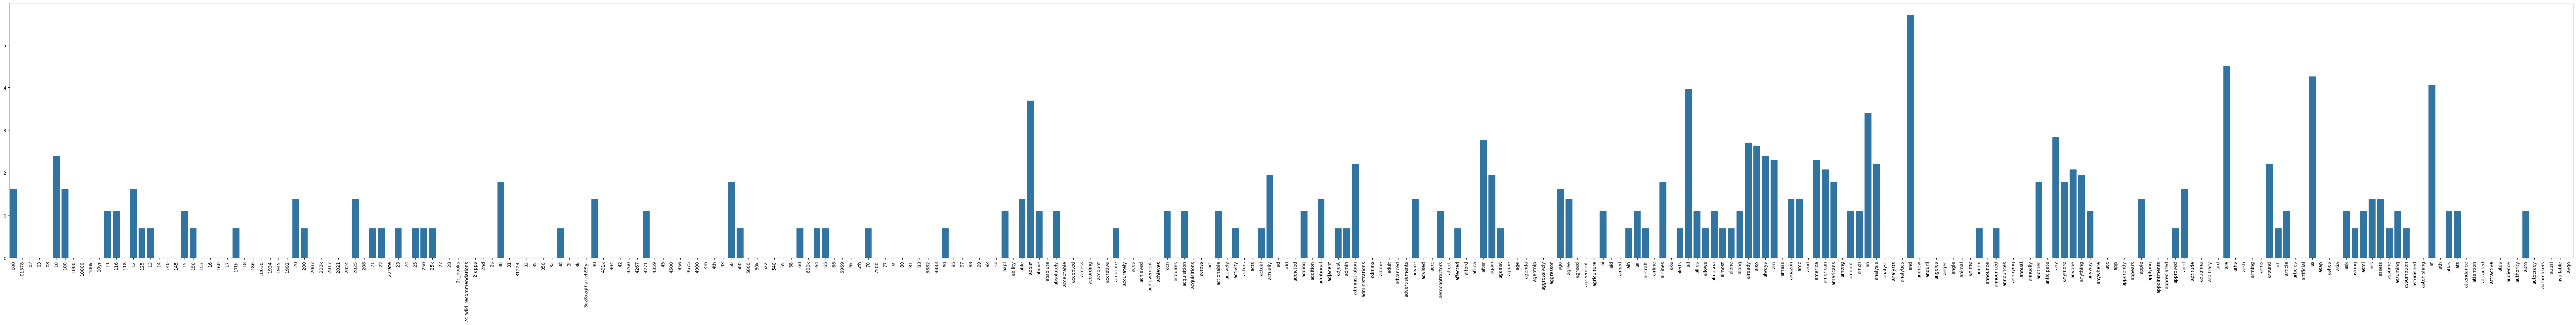

In [130]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

top frequency terms ( log )

/var/folders/49/11swh7_n1x358qyfrqndksw00000gn/T/ipykernel_57444/1314664237.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



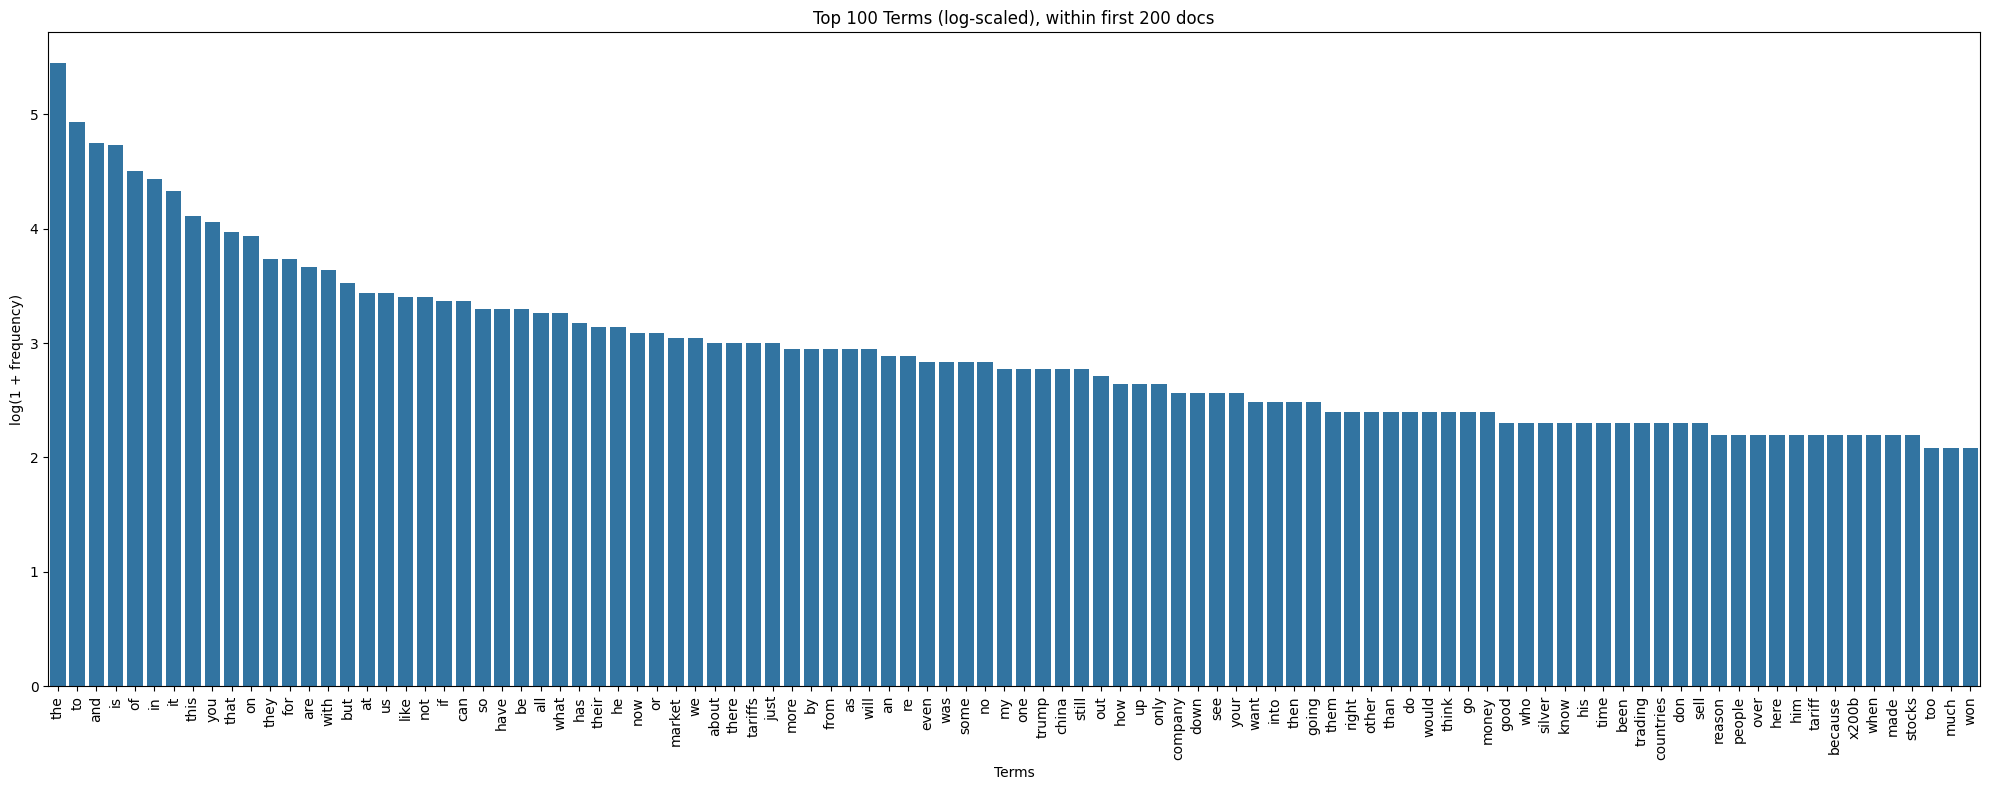

In [131]:
# choose the amount of documents/terms to visualize
num_docs_2 = 200
top_n_2    = 100

# calculate raw term frequencies in the first num_docs_2 documents
tf = np.asarray(Reddit_sample_counts[:num_docs_2].sum(axis=0)).ravel()    

# select the indices of the top_n_2 most frequent terms (by raw counts)
rough     = np.argpartition(tf, -top_n_2)[-top_n_2:]
topn_idx  = rough[np.argsort(tf[rough])[::-1]]                 # sorted by raw frequency desc

# take the amount of top_n_2 terms in each of the first num_docs_2 documents
X_small = Reddit_sample_counts[:num_docs_2, topn_idx].toarray()
terms   = np.array(count_vect.get_feature_names_out())[topn_idx]

# apply log transform for plotting (sublinear scaling)
tf_log = np.log1p(tf)                                          # log(1 + tf), shape: (n_terms,)
top_term_frequencies_log = tf_log[topn_idx]                    # same terms as above


plt.figure(figsize=(20, 8))
g = sns.barplot(x=terms, y=top_term_frequencies_log)
g.set_xticklabels(terms, rotation=90)
plt.title(f"Top {top_n_2} Terms (log-scaled), within first {num_docs_2} docs")
plt.xlabel("Terms")
plt.ylabel("log(1 + frequency)")
plt.tight_layout()
plt.show()


Scatter plot: Polarity vs Subjectivity by Subreddit

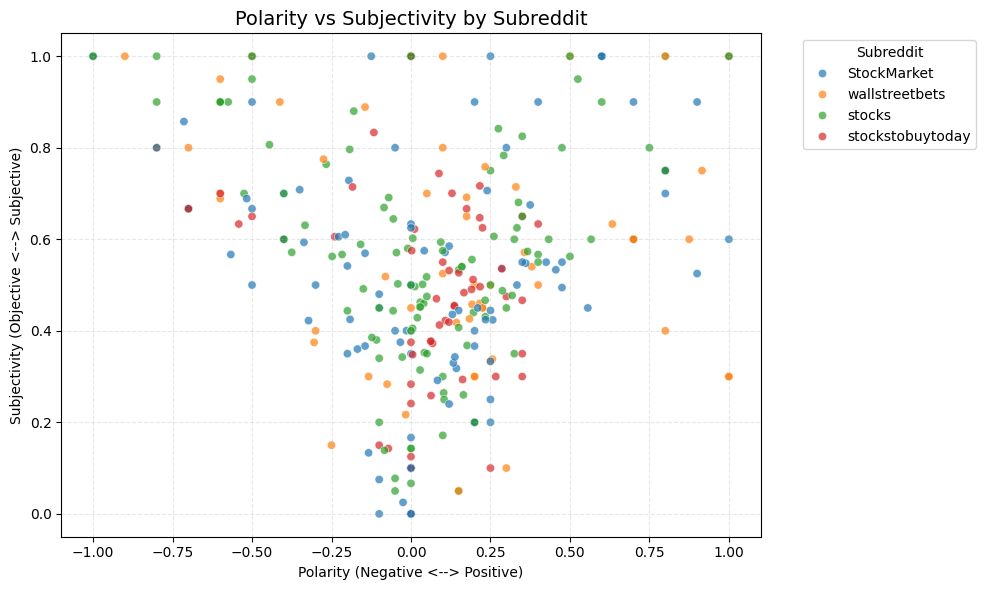

In [167]:
Reddit_sample['polarity'] = pd.to_numeric(Reddit_sample['polarity'], errors='coerce')
Reddit_sample['subjectivity'] = pd.to_numeric(Reddit_sample['subjectivity'], errors='coerce')


df_plot = Reddit_sample.dropna(subset=['polarity', 'subjectivity', 'subreddit'])

top_subs = df_plot['subreddit'].value_counts().head(8).index
df_top = df_plot[df_plot['subreddit'].isin(top_subs)]


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_top,
    x='polarity',
    y='subjectivity',
    hue='subreddit',
    alpha=0.7,
    palette='tab10'
)

plt.title("Polarity vs Subjectivity by Subreddit", fontsize=14)
plt.xlabel("Polarity (Negative <--> Positive)")
plt.ylabel("Subjectivity (Objective <--> Subjective)")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### 整體觀察
1. 情緒極性分佈: 大多數點集中在 接近 0 的區域，表示多數貼文的情緒偏中立，接近 -1 或 +1 的極端情緒貼文相對少見。
2. 主觀性分佈: 多數貼文的主觀性介於 0.4 到 0.8 之間，顯示大部分內容帶有一定的主觀意見，而非完全客觀。

##### Subreddit 差異
StockMarket（藍色） 與 stocks（綠色） 分佈較均勻，整體情緒偏中性，可能反映分析討論類貼文居多。
wallstreetbets（橘色） 的點分布較極端且主觀性高。
stockstobuytoday（紅色） 的貼文多為中度正向但主觀性偏高，可能表示其內容多為個人意見或建議。

##### 解讀與洞察

推測社群性質：
* StockMarket 可能為提供分析建議的社群，使其語氣中立、主觀性低。
* wallstreetbets 語氣極端、主觀性高，推測其社群可能較情緒化或投機。


# Phase 2

In [86]:
### Begin Assignment Here